# Importo las librerias

In [1]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Calibración

In [2]:
def obtener_espectros(ruta, sep = ',', sep_str = ';'):
    #ruta  -->   Debe ser la dirección de la carpeta correspondiente al elemento
    mediciones = os.listdir(ruta)
    
    #-----------------------
    # Cargo las mediciones
    #-----------------------
    lamb_e, I_e = [], []
    for med in tqdm(mediciones):
        if med[-4:] == '.csv':
            ruta_med = ruta + f'/{med}'
            df = pd.read_csv(ruta_med, sep = sep)[52 : -1].astype('string').to_numpy()[:, 0]
            datai = [ (data.split(sep_str)) for data in df]
            
            lamb_i = [ float(di[0]) for di in datai]
            I_i = [ float(di[1]) for di in datai]
            lamb_e.append(lamb_i), I_e.append(I_i)
            
    lamb_e, I_e = np.array(lamb_e), np.array(I_e)
    
    #----------------------
    # Valor medio y std
    #----------------------
    I, err_I = [], []
    lamb, err_lamb = [], []
    for i in range(0, len(lamb_i)):
        I.append(np.mean(I_e[:, i])), err_I.append(np.std(I_e[:, i]))
        lamb.append(np.mean(lamb_e[:, i])), err_lamb.append(np.std(lamb_e[:, i]))
        
    """
    Primera lista:
        * Elemento_0: lista de valores medios sobre longitud de onda
        * Elemento_1: lista de valores std sobre longitud de onda
    Segunda lista:
        * Elemento_0: lista de valores medios sobre intensidad
        * Elemento_1: lista de valores std sobre intensidad
    """
    return [lamb, err_lamb], [I, err_I]

In [3]:
ruta_mediciones = 'Mediciones'
elementos = os.listdir(ruta_mediciones)

lambs, Is, nombre = [], [], []
for elemento in elementos:
    print(elemento)
    ruta_elemento = ruta_mediciones + f'/{elemento}'
    lamb_elemento, I_elemento = obtener_espectros(ruta_elemento)
    lambs.append(lamb_elemento), Is.append(I_elemento), nombre.append(elemento)

Argon


100%|██████████| 8570/8570 [03:28<00:00, 41.11it/s]


Halogena


100%|██████████| 1600/1600 [00:27<00:00, 59.04it/s]


Helio


100%|██████████| 1063/1063 [00:17<00:00, 59.23it/s]


krypton


100%|██████████| 1143/1143 [00:19<00:00, 59.13it/s]


Mercurio


100%|██████████| 1067/1067 [00:18<00:00, 58.74it/s]


Neon


100%|██████████| 1176/1176 [00:19<00:00, 59.09it/s]


[697.8481445 708.0157471 728.6411743 739.7978516 751.9101562 752.8429565
 764.7505493 773.8737793 796.3952026 802.9812012 812.8746338 827.7474976
 843.8446045]


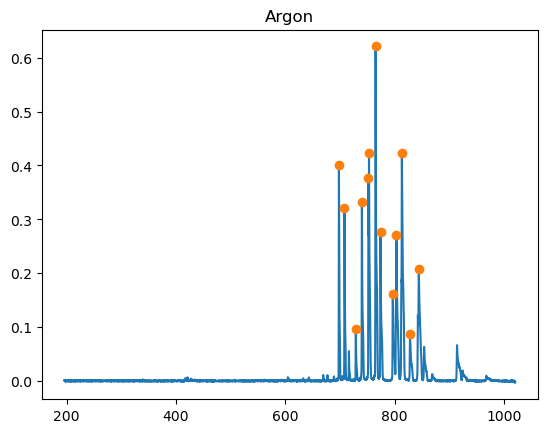

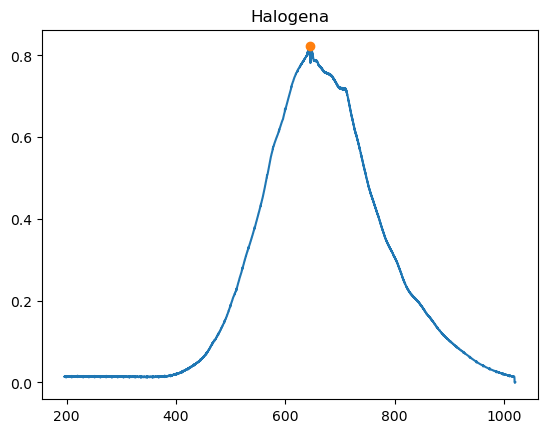

[588.8740234 669.298645  707.7844238]


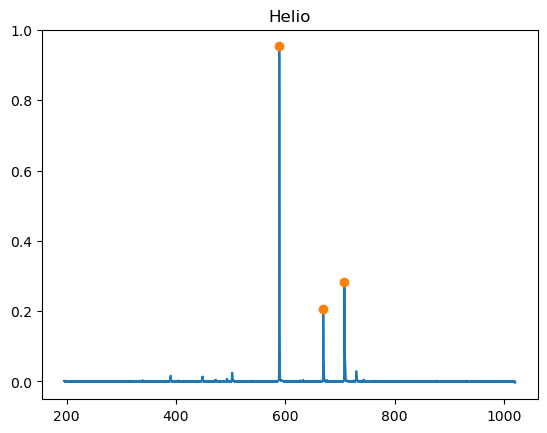

[588.4219971 760.0778198 761.479248  770.8309937 812.8746338 820.4241943
 831.2943726]


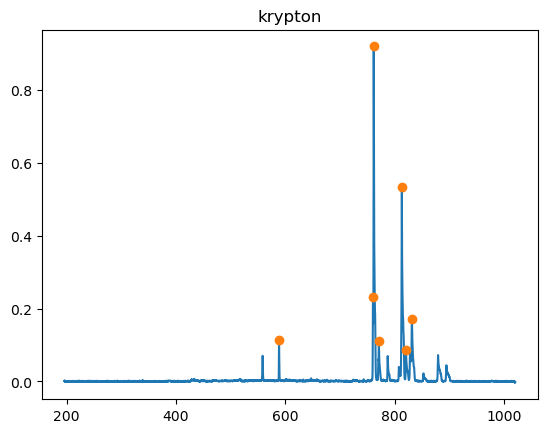

[437.5336304 547.2306519 578.2612915 580.2918091 697.8481445 708.0157471
 739.7978516 752.8429565 764.9842529 812.8746338]


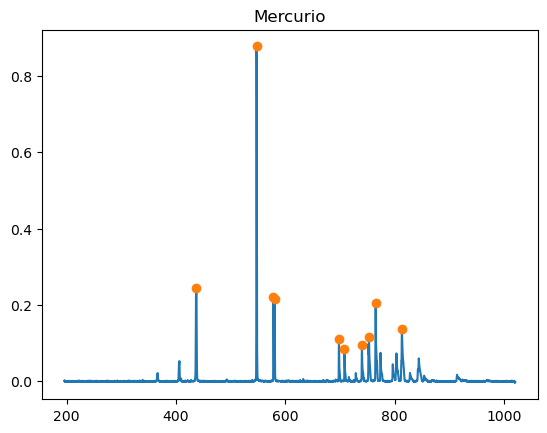

[586.6141357 589.5522461 595.8862305 608.8051147 611.0750122 615.8450317
 617.8907471 623.3498535 628.1314087 632.0054321 634.9698486 639.762207
 641.5890503 652.105896  654.6239624 661.2683105 669.298645  673.2035522
 694.3864136 704.5473022 725.8555908]


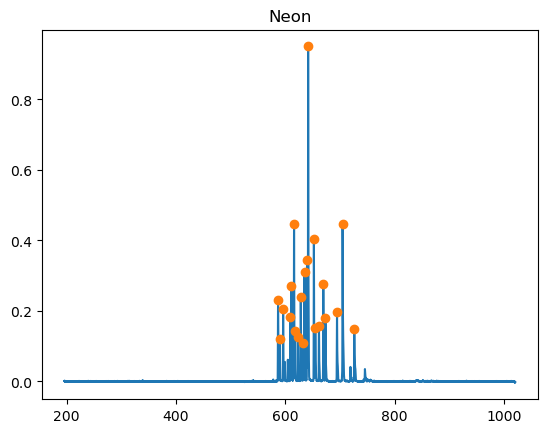

In [4]:
Emisiones_exp, err_Emisiones_exp, Emisiones_name = [], [], []
for L, I, name in zip(lambs, Is, nombre):
    l, err_l, i = np.array(L[0]), np.array(L[1]), np.array(I[0])
    
    peaks, _ = find_peaks(i, prominence = 0.05, height = 0.08)
    
    if name != 'Halogena':
        Emisiones_exp.append(l[peaks]), err_Emisiones_exp.append(err_l[peaks])
        Emisiones_name.append(name)
        print(l[peaks])
    
    plt.figure()    
    plt.plot(l, i, '-')
    plt.plot(l[peaks], i[peaks], 'o')
    plt.title(name)
    plt.show()

Emisiones_teo = [
    [696.543, 706.722, 714.704, 727.294, 738.398, 750.387, 
    751.465, 763.511, 772.376, 794.818, 800.615, 811.531, 826.452],
    [587.562, 667.816, 706.522],
    [587.613, 758.698, 760.135, 769.896, 811.531, 819.021, 830.436],
    [435.833, 546.074, 577.029, 579.065, 696.543, 706.522, 736.096, 752.575, 764.514, 811.262],
    [585.249, 587.562, 594.483, 607.434, 609.614, 615.422, 617.631, 622.718, 627.658, 631.899, 
    634.711, 638.299, 640.225, 650.652, 653.288, 659.895, 667.828, 672.556, 692.947, 703.241, 724.506]
]

## Ajuste lineal

Observamos para cada uno de los elementos si la relación entre las mediciones experimentales y teóricas es lineal y responde 1 a 1. Para esto utilizamos la siguiente relación lineal:

$$f(x) = ax + b$$

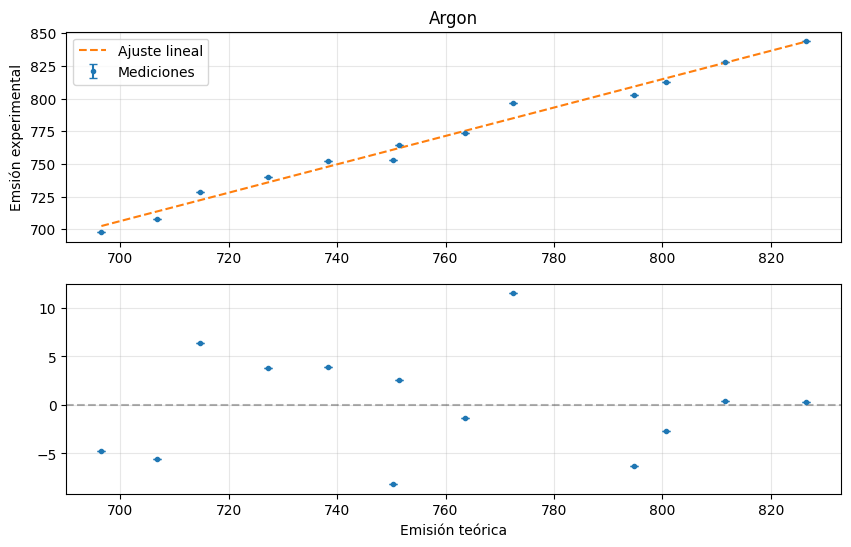

La pendiente es a = 1.085663526248367 +- 0.04080280500816711
La ordenada es b = -53.65313775006983 +- 30.973846069754714


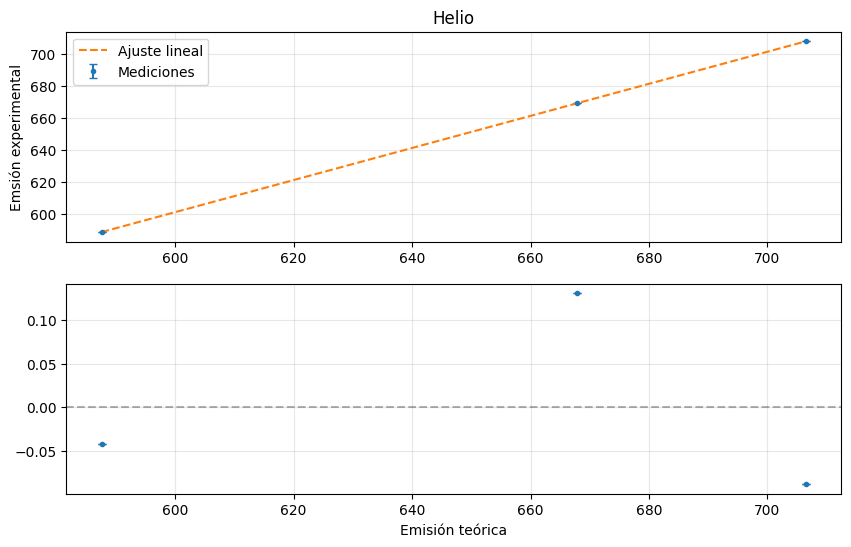

La pendiente es a = 0.9999669002884528 +- 0.0019035573670208444
La ordenada es b = 1.3740101747116167 +- 1.2484320000950815


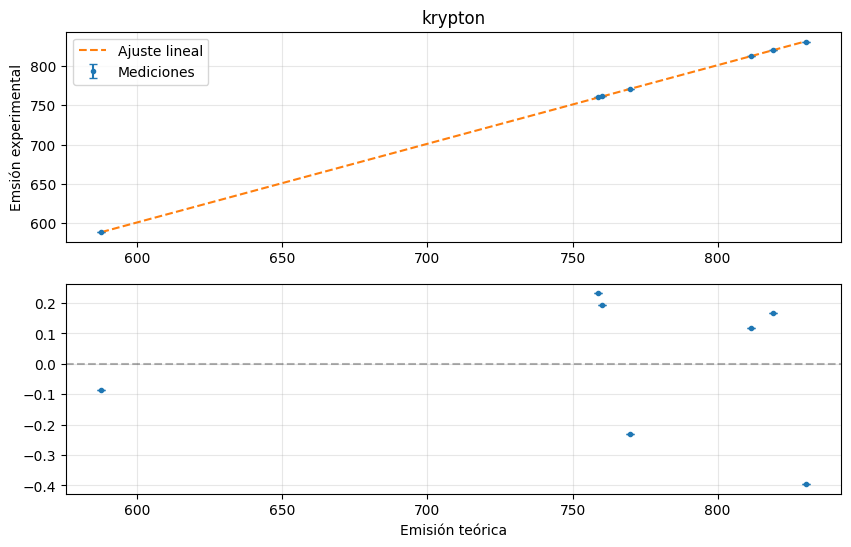

La pendiente es a = 1.0014852175812388 +- 0.0013076574666498163
La ordenada es b = 0.020880420629674212 +- 1.0019925453893086


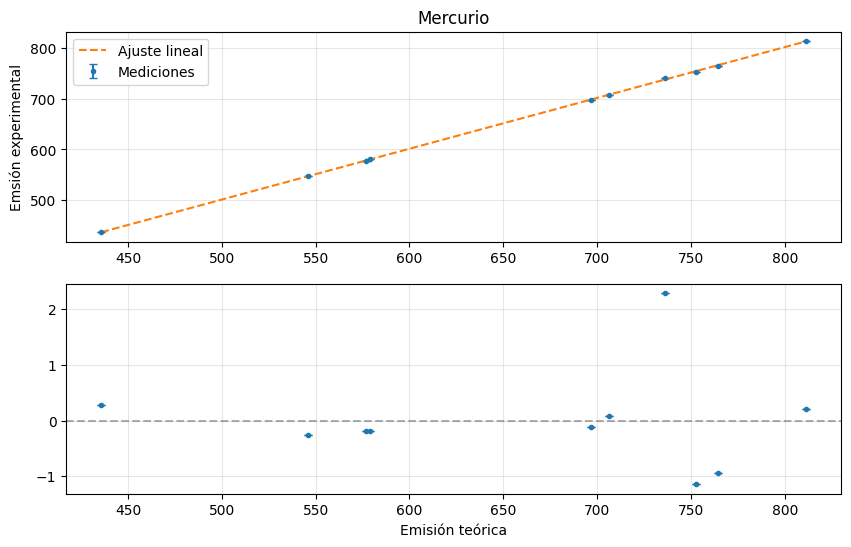

La pendiente es a = 0.9999565277646795 +- 0.002740844913302568
La ordenada es b = 1.4455125715570125 +- 1.8369006448850618


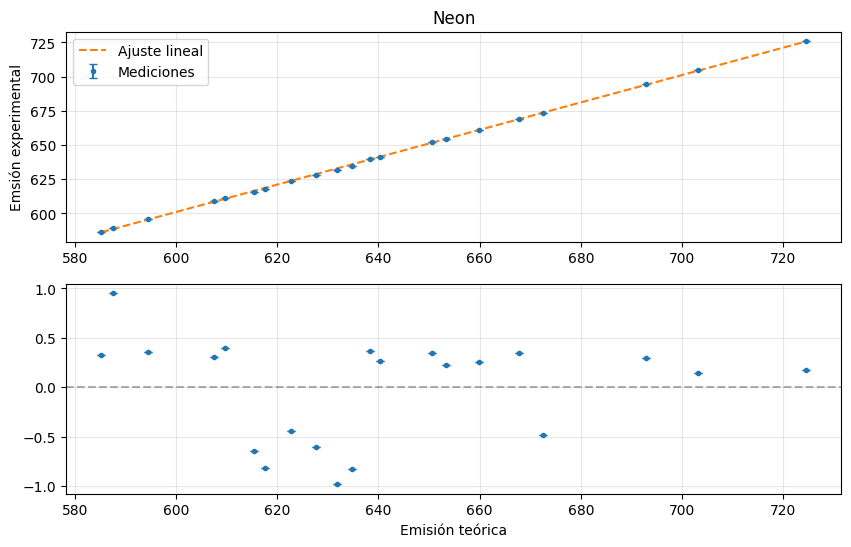

La pendiente es a = 1.0010178770308953 +- 0.003254577891354109
La ordenada es b = 0.4414259346272158 +- 2.0859547495547894


In [14]:
f = lambda x, a, b: a*x + b
for emi_teo, emi_exp, err_emi_exp, title in zip(Emisiones_teo, Emisiones_exp, err_Emisiones_exp, Emisiones_name):
    emi_teo, emi_exp = np.array(emi_teo), np.array(emi_exp)
    
    popt, pcov = curve_fit(f, emi_teo, emi_exp)
    pcov = np.sqrt(np.diag(pcov))
    
    fig, axs = plt.subplots(2, 1, figsize = (10, 6))
    
    axs[0].errorbar(emi_teo, emi_exp, yerr = err_emi_exp, 
                    fmt = '.', capsize = 3, label = 'Mediciones')
    axs[0].plot(emi_teo, f(emi_teo, *popt), '--', label = 'Ajuste lineal')
    axs[0].set(ylabel = 'Emsión experimental', title = title), axs[0].grid(alpha = 0.3)
    axs[0].legend()
    
    axs[1].errorbar(emi_teo, emi_exp - f(emi_teo, *popt),yerr = err_emi_exp,fmt = '.',capsize = 3)
    axs[1].set(xlabel = 'Emisión teórica')
    axs[1].axhline(0, linestyle = '--', color = 'black', alpha = .3)
    axs[1].grid(alpha = 0.3)
    
    plt.show()
    
    print(f'La pendiente es a = {popt[0]} +- {pcov[0]}')
    print(f'La ordenada es b = {popt[1]} +- {pcov[1]}')
    

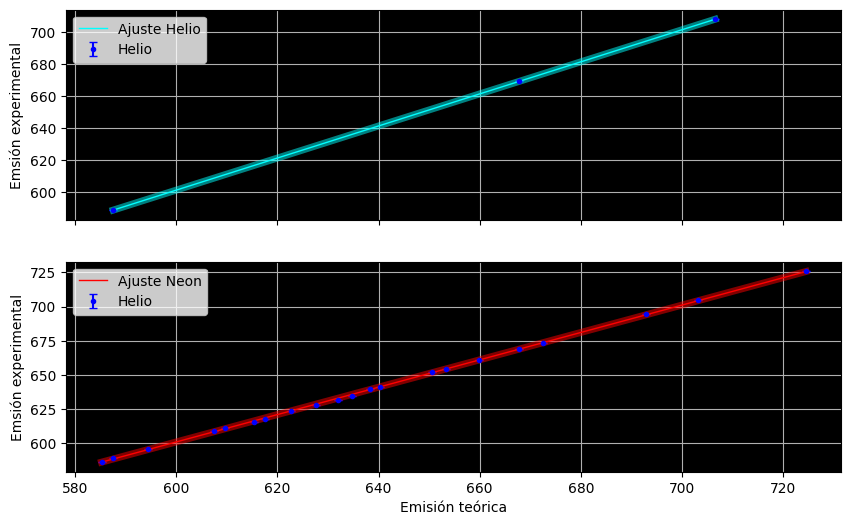

In [47]:
emision_teo_helio = Emisiones_teo[1]
emision_exp_helio = Emisiones_exp[1]
err_emision_exp_helio = err_Emisiones_exp[1]

popt, pcov = np.polyfit(emision_teo_helio, emision_exp_helio, 1, cov = True)
pcov = np.sqrt(np.diag(pcov))
ajuste_helio = np.polyval(popt, emision_teo_helio)

emision_teo_neon = Emisiones_teo[-1]
emision_exp_neon = Emisiones_exp[-1]
err_emision_exp_neon = err_Emisiones_exp[-1]

popt, pcov = np.polyfit(emision_teo_neon, emision_exp_neon, 1, cov = True)
pcov = np.sqrt(np.diag(pcov))
ajuste_neon = np.polyval(popt, emision_teo_neon)

fig,axs = plt.subplots(figsize = (10, 6),nrows=2, ncols=1,sharex=True)
axs[0].set_facecolor('black')
axs[1].set_facecolor('black')

axs[0].errorbar(emision_teo_helio, emision_exp_helio, yerr = err_emision_exp_helio, 
                fmt = '.', capsize = 3, label = 'Helio', color = 'blue')
axs[0].plot(emision_teo_helio, ajuste_helio, '-', color = 'cyan', label = 'Ajuste Helio',linewidth = 1)
axs[0].plot(emision_teo_helio, ajuste_helio, '-', color = 'cyan',linewidth = 5,alpha=0.5)
axs[0].legend()
axs[0].grid()

axs[1].errorbar(emision_teo_neon, emision_exp_neon, yerr = err_emision_exp_neon, 
                fmt = '.', capsize = 3, label = 'Helio', color = 'blue')
axs[1].plot(emision_teo_neon, ajuste_neon, '-', color = 'red', label = 'Ajuste Neon',linewidth = 1)
axs[1].plot(emision_teo_neon, ajuste_neon, '-', color = 'red',linewidth = 5,alpha=0.5)
axs[1].legend()

axs[0].set(ylabel = 'Emsión experimental')
axs[1].set(xlabel = 'Emisión teórica', ylabel = 'Emsión experimental')

axs[1].grid()

# Ley de **Beer-Lambert**

La calcular a ajustar es:

$$A = - \log_{10}\bigg( \frac{I}{I_0} \bigg)$$

Donde:

* $A$: absorción
* $I$: Intensidad luminosa saliente y entrante
* $I_0$: Intensidad luminosa entrante


In [17]:
ruta_mediciones = 'Porta-cubetas'
mediciones = os.listdir(ruta_mediciones)

lambs_BL, Is_BL, abs_teo = [], [], []
for medicion in mediciones[:-1]:
    print(medicion)
    ruta_medicion = ruta_mediciones + f'/{medicion}'
    lamb_medicion, I_medicion = obtener_espectros(ruta_medicion, sep = ';', sep_str = ',')
    lambs_BL.append(lamb_medicion), Is_BL.append(I_medicion)
    if medicion != 'control':
        abs_teo.append(float(medicion))
    else:
        abs_teo.append(medicion)

0.3e-5


100%|██████████| 166/166 [00:01<00:00, 102.71it/s]


0.5e-5


100%|██████████| 171/171 [00:01<00:00, 102.96it/s]


0.7e-5


100%|██████████| 302/302 [00:03<00:00, 97.53it/s] 


0.9e-5


100%|██████████| 218/218 [00:02<00:00, 100.09it/s]


1.1e-5


100%|██████████| 325/325 [00:03<00:00, 89.00it/s] 


1.3e-5


100%|██████████| 302/302 [00:05<00:00, 60.10it/s]


control


100%|██████████| 155/155 [00:02<00:00, 61.22it/s]


C:\Users\publico\AppData\Local\Temp\ipykernel_15384\1911930641.py:16: RuntimeWarning: invalid value encountered in log10
  axs[1].plot(Lamb[:-10], -np.log10(Int[:-10] / ref_I[:-10]), '.', label = f'{Abso}')


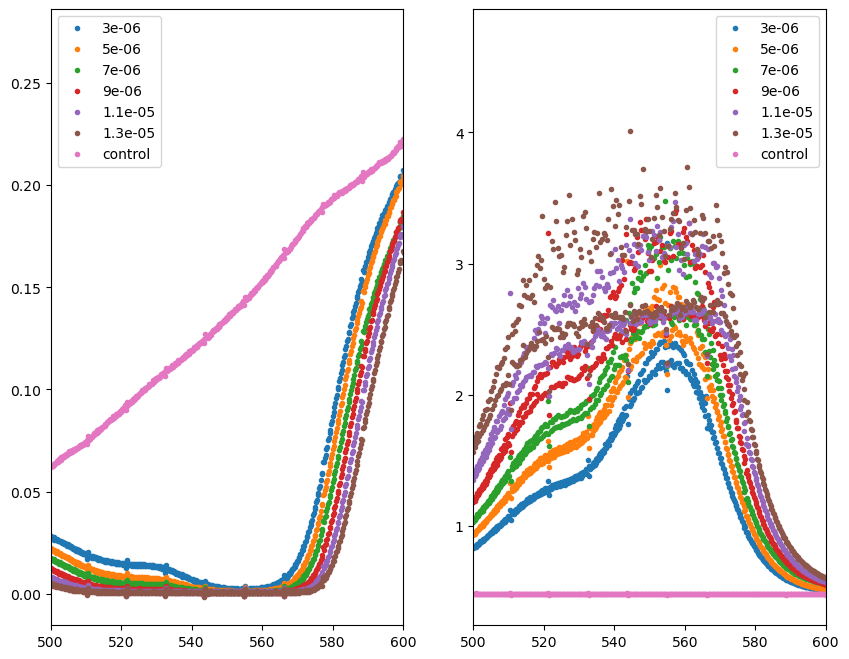

In [56]:
# Defino las referencias1
ref_I, ref_lamb = Is[1][0], lambs[1][0]
n0 = 20
# Corro el loop
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
I_abs, err_I_abs, lamb_abs, Abs_names = [], [], [], []
for Lambd, Inte, Abso in zip(lambs_BL, Is_BL, abs_teo):
    Lamb, Int, err_Int = np.array(Lambd[0]), np.array(Inte[0]), np.array(Inte[1])
    
    if Abso != 'control':
        peaks, _ = find_peaks(Int, height = (0, .05), prominence = 0.005)
        I_abs.append(Int[peaks]), err_I_abs.append(err_Int[peaks])
        lamb_abs.append(Lamb[peaks]), Abs_names.append(Abso)
    
    axs[0].plot(Lamb[:-10], Int[:-10], '.', label = f'{Abso}') #, axs[0].plot(Lamb[peaks][:-10], Int[peaks][:-10], 'o')
    axs[1].plot(Lamb[:-10], -np.log10(Int[:-10] / ref_I[:-10]), '.', label = f'{Abso}')

    axs[0].set(xlim = (500, 600))
    axs[1].set(xlim = (500, 600))
    

    axs[0].legend()
    axs[1].legend()
    #axs[0].title(Abso), plt.ylabel('Intensidad'), plt.xlabel(r'$\lambda [nm]$')
    #axs[0].grid(alpha = 0.3)

    #axs[1].title(Abso), plt.ylabel('Intensidad'), plt.xlabel(r'$\lambda [nm]$')


plt.show()


# Intensidad de base
punto = np.where((lambs_BL[-1][0] >= np.min(lamb_abs)) & (lambs_BL[-1][0] <= np.max(lamb_abs)))[0]
I_c_posibles = np.array(Is_BL[-1][0])[punto]
I_control, err_I_control = np.mean(I_c_posibles), np.std(I_c_posibles)

# Ley de Beer-Lambert
As, err_As = [], []
for i_abs, err_i_abs in zip(I_abs, err_I_abs):
    i_abs, err_i_abs = i_abs[0], err_i_abs[0]
    var_A = (err_i_abs / (i_abs * np.log(10)))**2 + (err_I_control / (I_control * np.log(10)))**2
    
    As.append(-np.log10(i_abs / I_control)), err_As.append(np.sqrt(var_A))
    

In [ ]:
for Lambd, Inte, Abso in zip(lambs_BL, Is_BL, abs_teo):
    

## Análisis de absorbancia

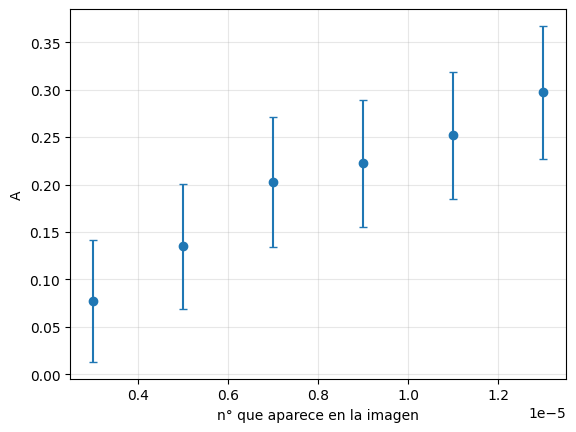

In [ ]:
plt.figure()
plt.errorbar(Abs_names, As, yerr = err_As,
             fmt = 'o', capsize = 3)
plt.ylabel('A'), plt.xlabel('n° que aparece en la imagen')
plt.grid(alpha = 0.3)
plt.show()